# Decision Trees Intution & Model Building Guide

![](https://i.imgur.com/N8aIuRK.jpg)

# The following topics are covered in this tutorial:

- **Importing a real-world dataset**

- **Preparing a dataset for training**

- **Training and interpreting decision trees**

- **Training and interpreting random forests**

- **Overfitting & hyperparameter tuning**

- **Making predictions on single inputs**

# Problem Statement

This tutorial takes a practical and coding-focused approach. We'll learn how to use _decision trees_ and _random forests_ to solve a real-world problem from [Kaggle](https://kaggle.com/datasets):

> **QUESTION**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
> 
> ![](https://i.imgur.com/5QNJvir.png)
>
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 
>
>
> ![](https://i.imgur.com/KWfcpcO.png)


Let's import some required libraries before we begin.

# Importing Necesary Libraries and setting the notebook style prefferences

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Importing and Overviewing the Data

The dataset is available at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package .

The file `weatherAUS.csv` contains the data. Let's load it into a Pandas dataframe.

In [2]:
raw_df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [3]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Each row shows the measurements for a given date at a given location. The last column "RainTomorrow" contains the value to be predicted.

Let's check the column types of the dataset.

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Let's also see the descriptive statistics of the dataset.

In [5]:
raw_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


We can try to visualise the outliers to get an basic idea.

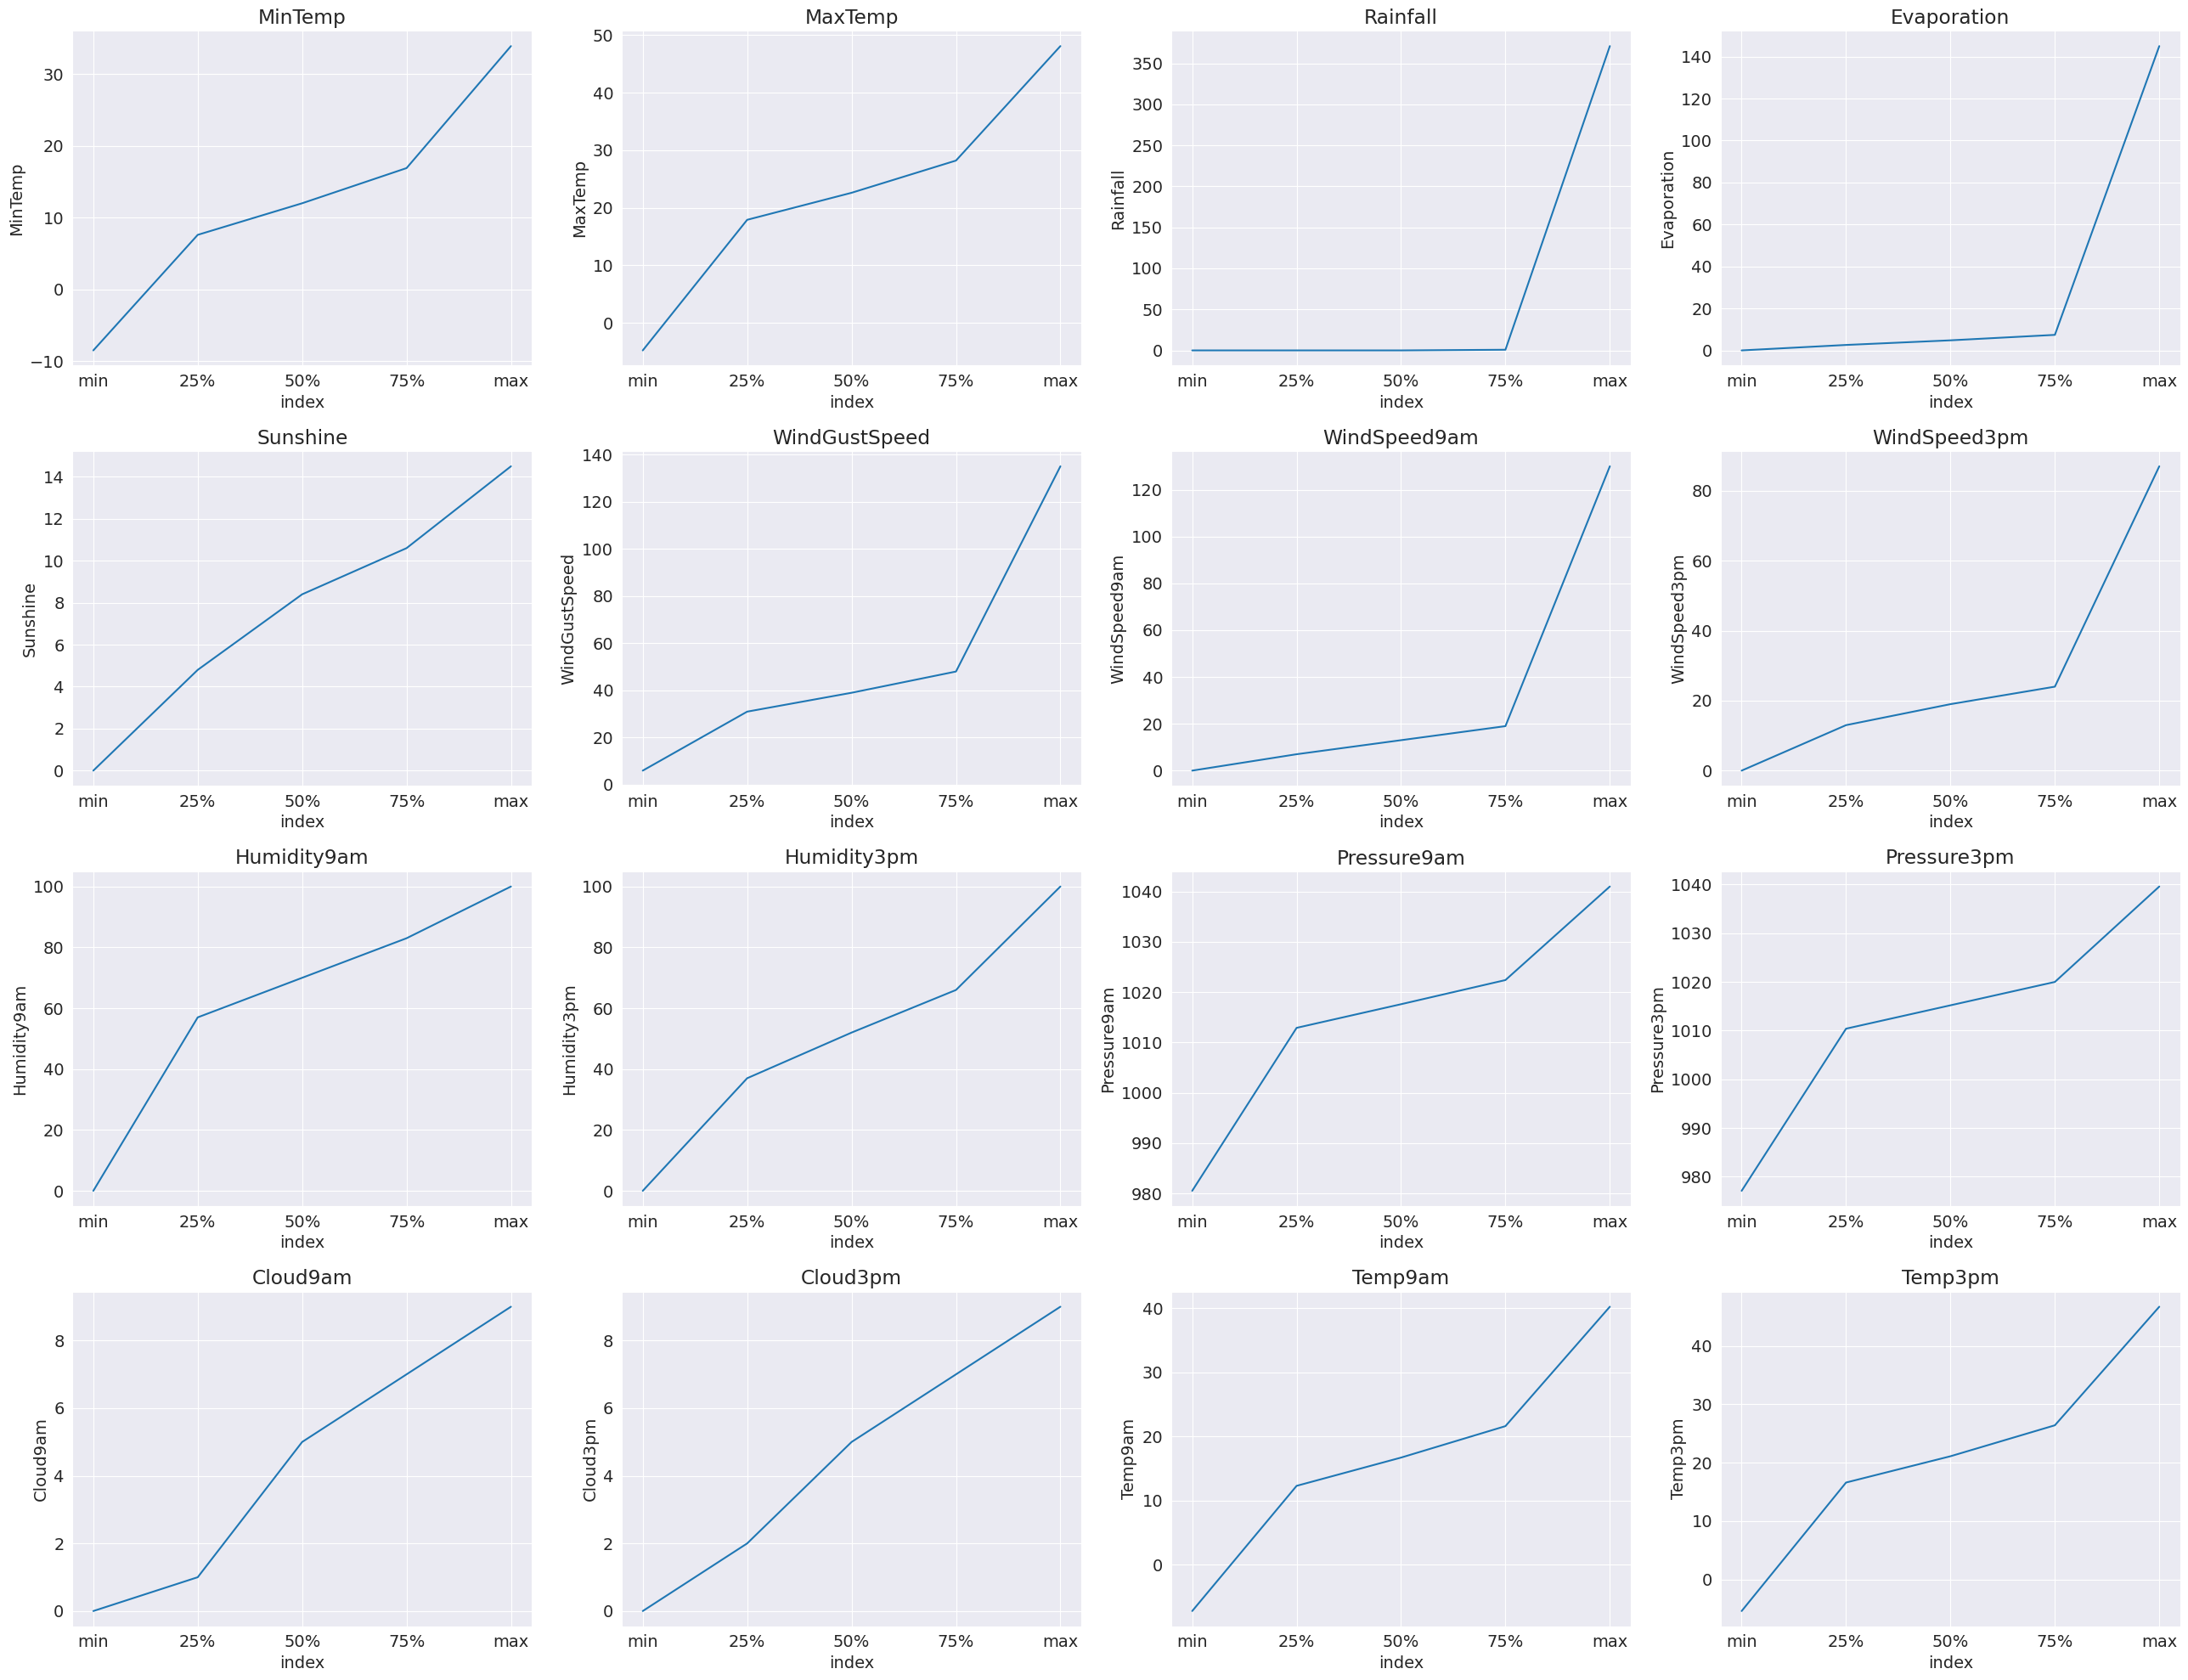

In [4]:
import matplotlib.pyplot as plt   #u can ignore this code and skip this step this is just to visualise the data distribution.
import seaborn as sns

# Compute summary statistics for numeric columns
describe_num_df = raw_df.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
# To remove 'mean' and 'std' from index
describe_num_df = describe_num_df[~describe_num_df['index'].isin(['mean', 'std'])]


# Create a grid of subplots
fig, axes = plt.subplots(nrows=4
                         , ncols=4, figsize=(26, 20))

# Plot each numeric column on a separate subplot
for i, ax in zip(describe_num_df.columns[1:], axes.flatten()):
    sns.lineplot(x="index", y=i, data=describe_num_df, ax=ax)
    ax.set_title(i)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

As we can see of how the data in each column is destributed we can see that the columns like "$Rainfall$" ,"$Evaporation$" seems to have outliers or uneven data distribution. with most of the data lie at one range the rest of the few will lie in a range which is not relevant. This is what we can outliers or any special cases that needs attention. If these things aren't considered while building the model this will skew the data drastically.

<AxesSubplot:>

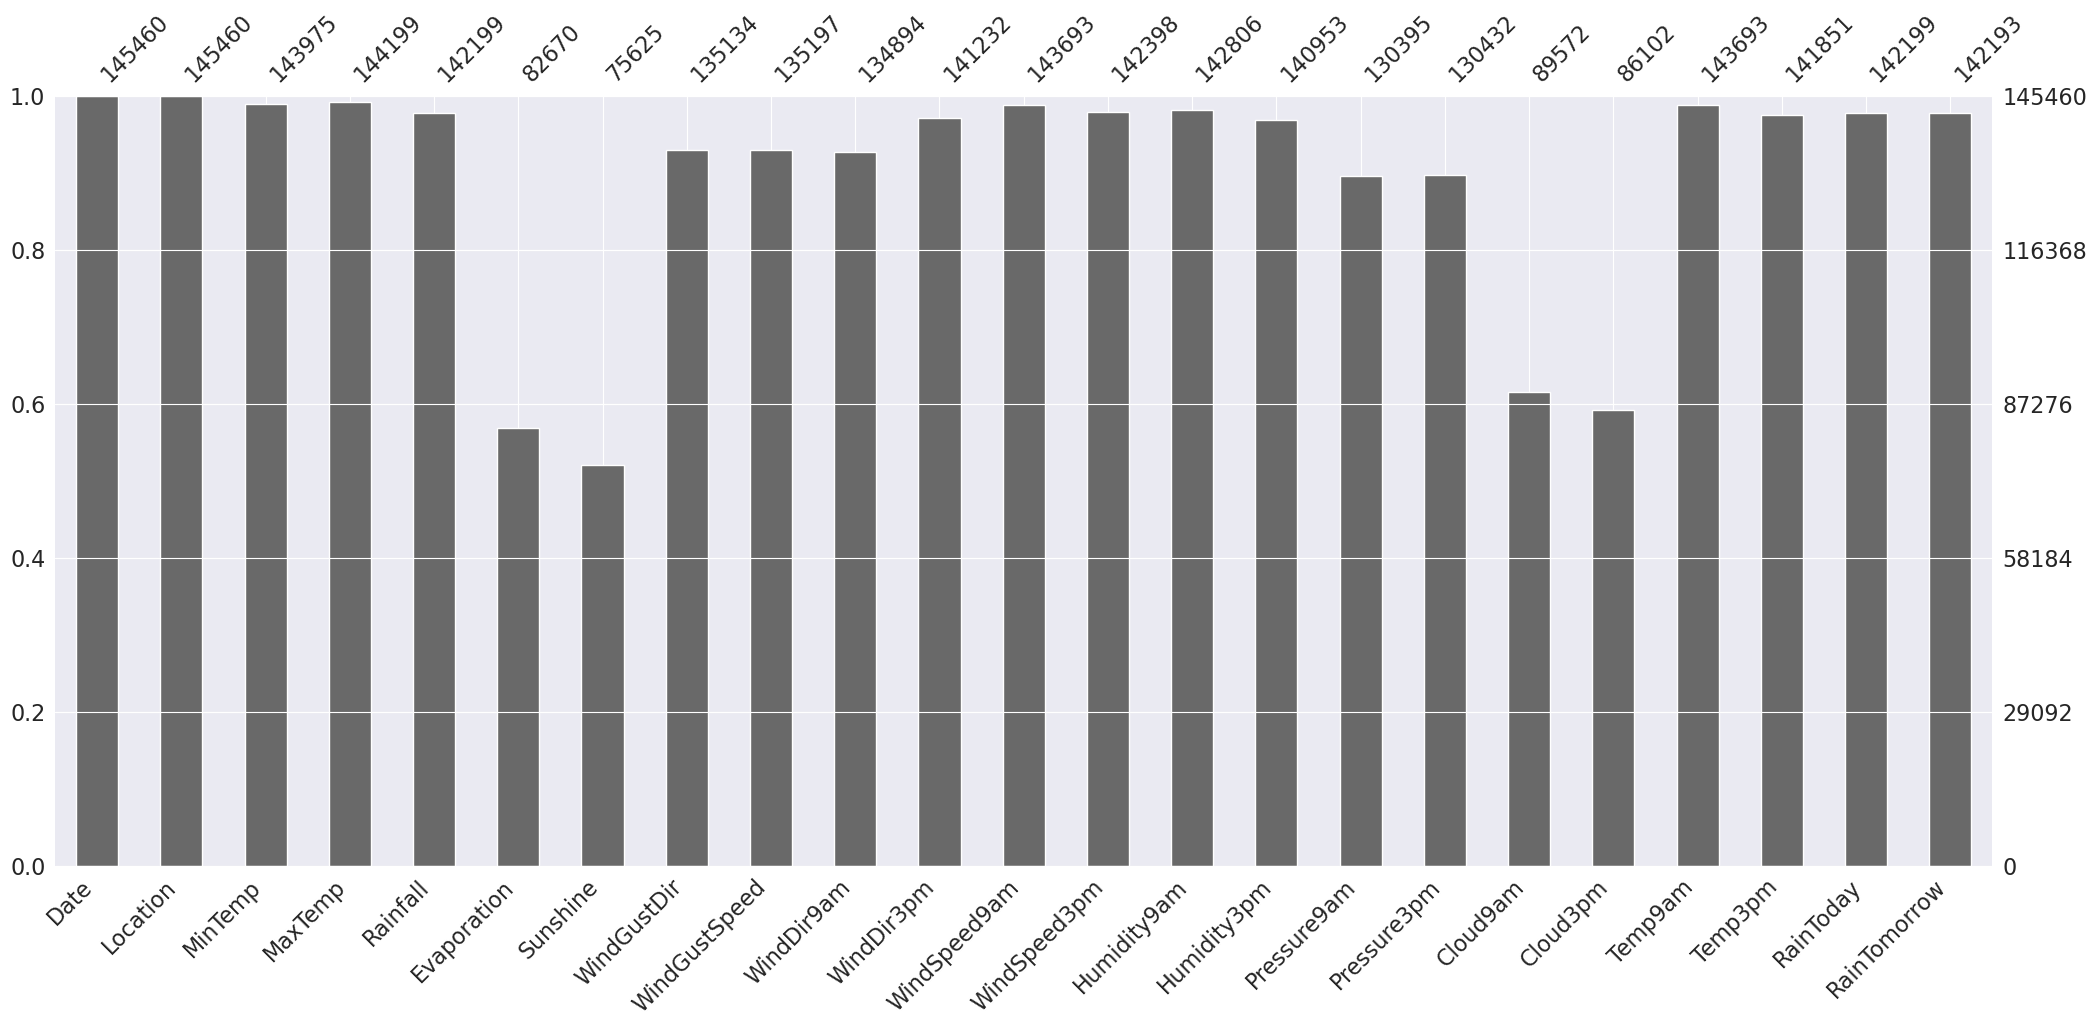

In [5]:
#We can also easily visualise the missing values using `missingno` package
import missingno as msno

#we have 3 options bar graph,matrix and heatmap. I'm going with bar graph.

msno.bar(raw_df)

**Let's drop any rows where the value of the target column `RainTomorrow` in empty. This is because the column which which wanna predict cannot be empty. If one want's to impute the missing values they can but it might skew the predicts futher more and generally it is not recommended. ALso we don't have many `NA` values so it is better to drop them.**

In [6]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

That got reduced from `145460` to `142193` still we have got a plenty of data to work with.

# Exploratory Data Analysis

<AxesSubplot:xlabel='RainToday', ylabel='Count'>

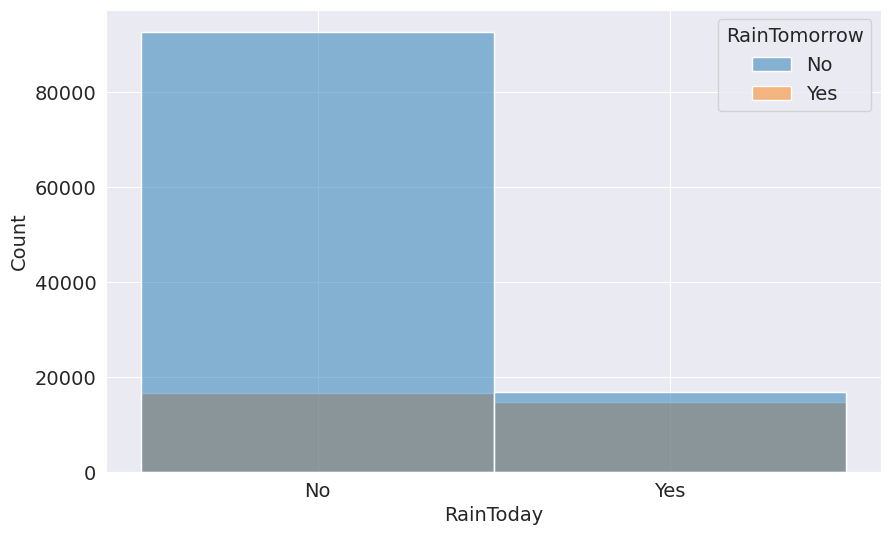

In [17]:
sns.histplot(data=raw_df,x='RainToday',hue='RainTomorrow')

**Note: This is a type of unbalanced dataset. This can lead to biased models, where the algorithm is more likely to predict the majority class, and less likely to predict the minority class. This can be problematic when the minority class is of interest, as it can result in false negatives or inaccurate predictions. This is importing to know about this while building an machine learning model. Read more about this [here](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/).**

<AxesSubplot:xlabel='Temp9am', ylabel='Temp3pm'>

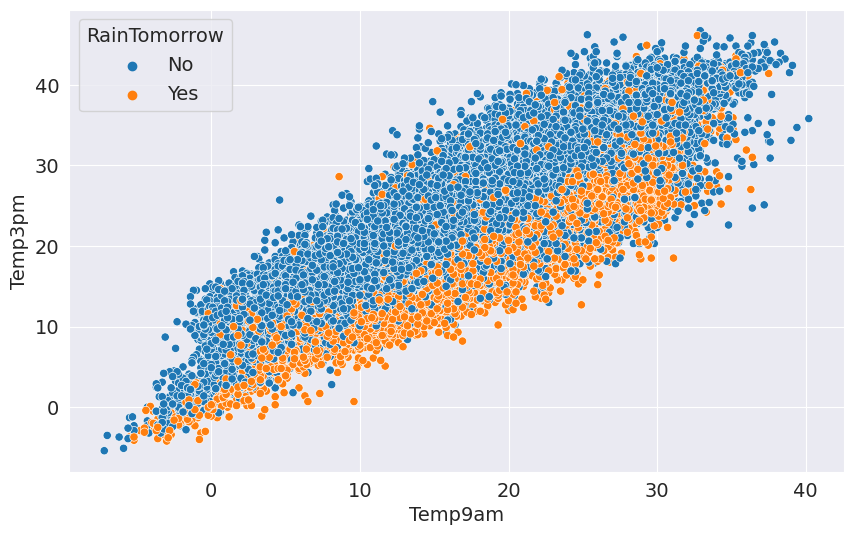

In [18]:
sns.scatterplot(data=raw_df,x='Temp9am',y='Temp3pm',hue='RainTomorrow')

<AxesSubplot:xlabel='Humidity9am', ylabel='Humidity3pm'>

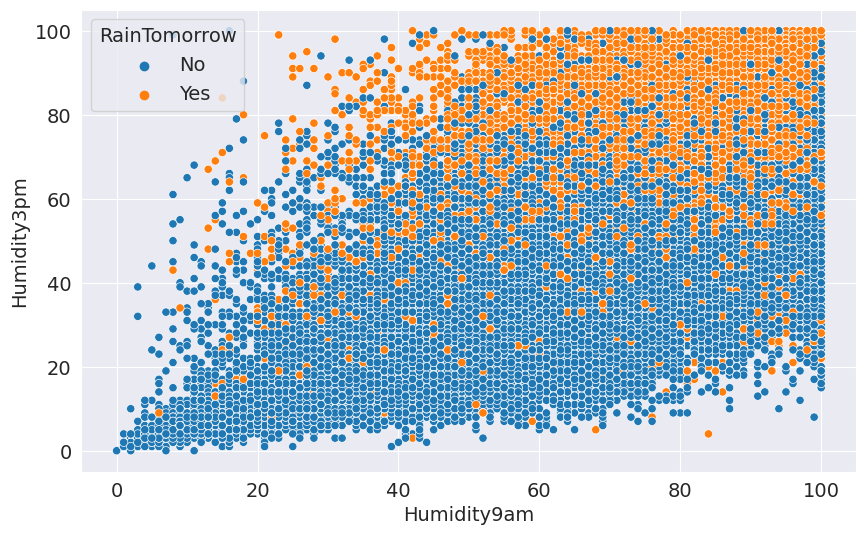

In [19]:
sns.scatterplot(data=raw_df,x='Humidity9am',y='Humidity3pm',hue='RainTomorrow')

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

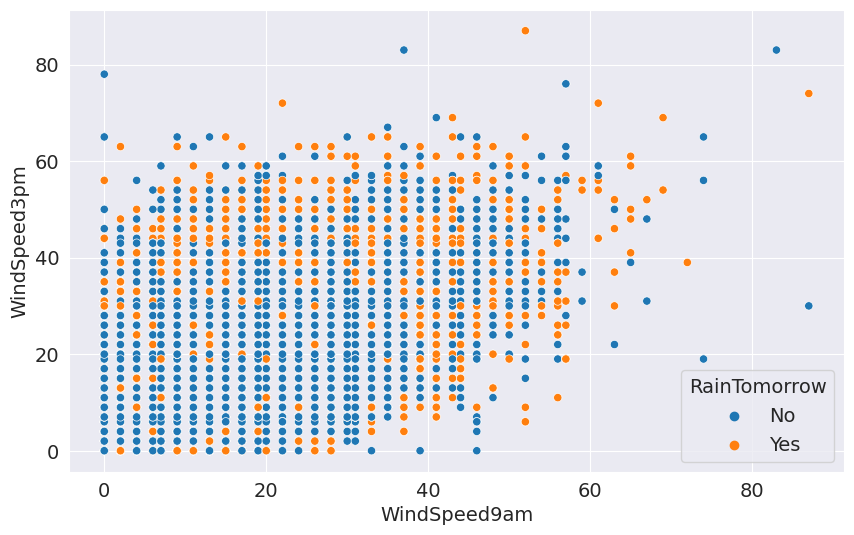

In [20]:
sns.scatterplot(data=raw_df,x='WindSpeed9am',y='WindSpeed3pm',hue='RainTomorrow')

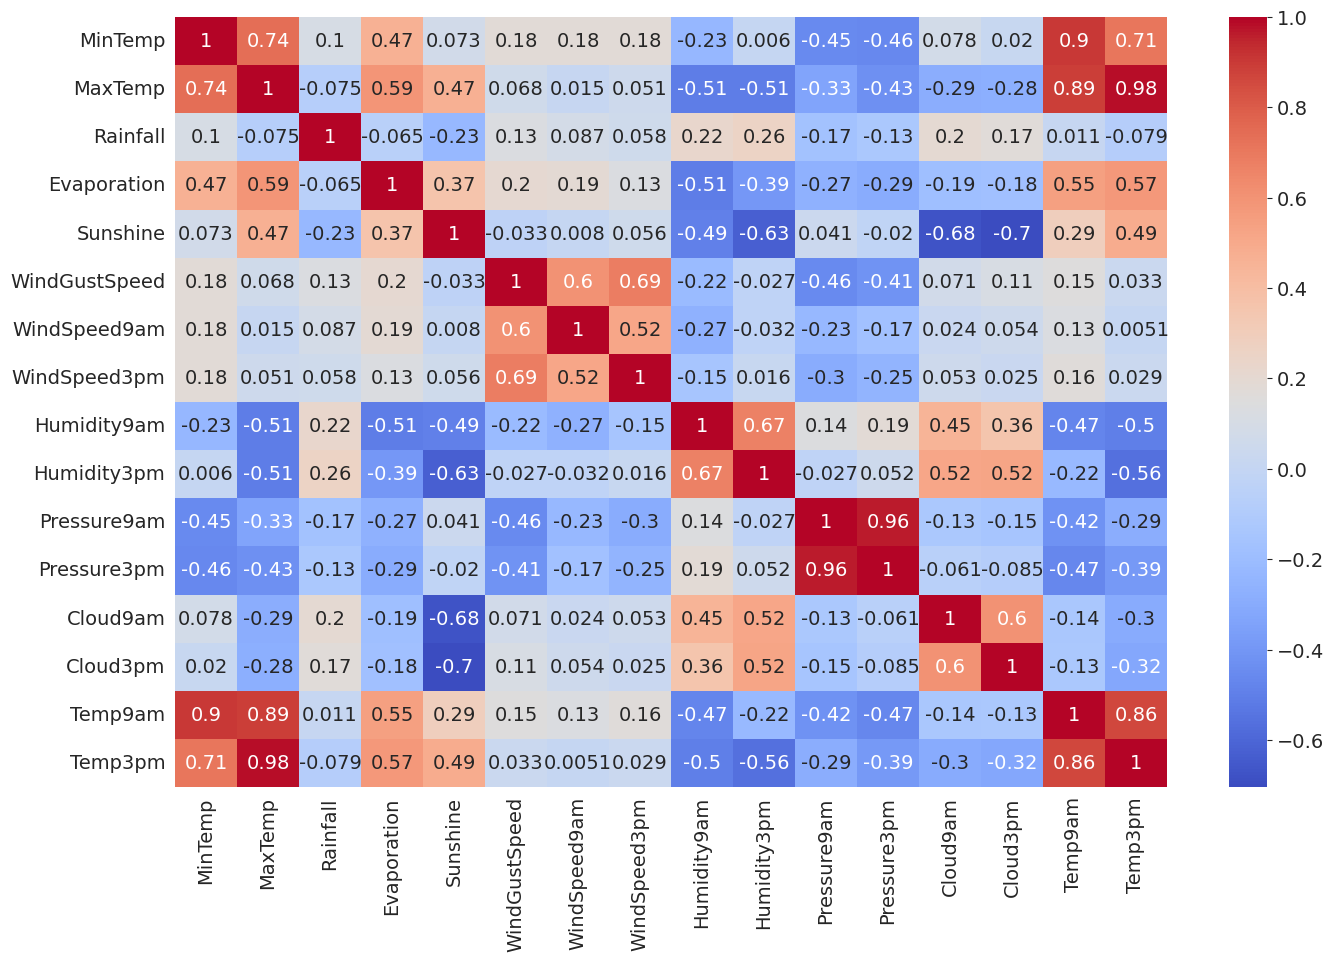

In [21]:
plt.figure(figsize=(16, 10))
sns.heatmap(raw_df.corr(), cmap='coolwarm',annot=True)
plt.show()

# Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

These are often basic and repettive and important task in preparing the dataset.

# Training, Validation and Test Sets

***While working with chronological data, it's often a good idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.***

**We'll use the data till 2014 for the training set, data from 2015 for the validation set, and the data from 2016 & 2017 for the test set.**

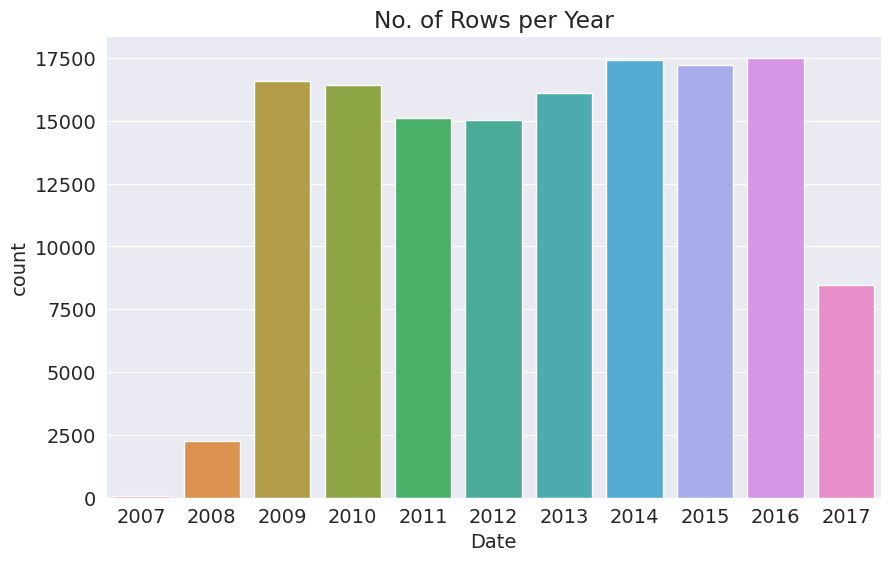

In [22]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [7]:
year = pd.to_datetime(raw_df.Date).dt.year #Extracting year values from `date` column

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [8]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


# Input and Target Columns

Let's identify the input and target columns.

## Note: 

Below i'm using a method by which:

1. ***I'll create a list of column names extracted from my source dataset like`list(dataset_name.columns)` . This will create a list of column names I wish to extract.***

2. ***Now i can store this list in some value like `name_of_list`. Then i can use this stored list of column names to act like a filter on any dataset that contains similar column names. This is actually usefull that you don't have to modify the dataframe each time.***

Below i've implemented what i explained till the end of this notebook. This is a pretty handy method.

In [9]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [10]:
train_inputs = train_df[input_cols].copy() #spliting train dataset to input and target columns
train_targets = train_df[target_col].copy()

In [11]:
val_inputs = val_df[input_cols].copy()  #spliting validation dataset to input and target columns
val_targets = val_df[target_col].copy()

In [12]:
test_inputs = test_df[input_cols].copy() #spliting test dataset to input and target columns
test_targets = test_df[target_col].copy()

### Let's also identify the numeric and categorical columns.

In [13]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist() #same columns to list method. but here extracting numerical columns
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()  #same columns to list method. but here extracting categorical columns

In [14]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [15]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


# Imputing missing numeric values

There are quite a lot of ways we can impute the missing values and it totally depnds on the requirement. `SimpleImputer` is one of the handy package than `sklearn` has to offer and even this packages as several way to impute. you can read about those [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html).


Imputing using mean is the simple and basic approach one will be doing. the steps are given below but i'm gonna use another method from `SimpleImputer` for a change.

`from sklearn.impute import SimpleImputer`

`imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])`

`train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])`
`val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])`
`test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])`

In [16]:
train_inputs[numeric_cols].isna().sum()

MinTemp            434
MaxTemp            198
Rainfall          1000
Evaporation      37110
Sunshine         40696
WindGustSpeed     6902
WindSpeed9am      1133
WindSpeed3pm      1140
Humidity9am       1265
Humidity3pm       1186
Pressure9am       9345
Pressure3pm       9309
Cloud9am         35764
Cloud3pm         36766
Temp9am            783
Temp3pm            663
dtype: int64

I'm Using a mentod called `IterativeImputer` which used to impute values based on other surrounding similar values. Technically this should be better than just imputing `mean` values for every columns with missing values. Inshort, ***IterativeImputer is a scikit-learn machine learning library that provides a method for imputing missing values in a dataset by modeling each feature with missing values as a function of the other features. It works by iteratively estimating missing values using regression models trained on the non-missing values in the dataset. The process continues until convergence or a maximum number of iterations is reached. This method can be useful when there are many missing values in a dataset, and it can be used for both regression and classification tasks.*** You can read about it [Here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html).

In [17]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

iterative_imputer=IterativeImputer(estimator=None, sample_posterior=False, max_iter=100, tol=0.001, n_nearest_features=None, initial_strategy='mean', imputation_order='ascending')

In [18]:
iterative_imputer.fit(raw_df[numeric_cols]) #i'm trainin it on raw_df but you can train on train,val or test datasets too.

IterativeImputer(max_iter=100)

In [19]:
train_inputs[numeric_cols] = iterative_imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = iterative_imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = iterative_imputer.transform(test_inputs[numeric_cols])

In [20]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Scaling Numeric Features

Another important step is to scale numerical features. In the machine learning algorithms if the values of the features are closer to each other there are chances for the algorithm to get trained well and faster instead of the data set where the data points or features values have high differences with each other will take more time to understand the data and the accuracy will be lower. So if the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower. Again similar to imputing there are several ways to scale features available in sklearn. You can learn more about [Here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html). Here i'm using one of the methods called `RobustScaler`. I've also given an example for `MinMaxScaler`. Information on how these work and their differences can be read in the `sklearn` link given above.

`from sklearn.preprocessing import MinMaxScaler`

`scaler = MinMaxScaler().fit(raw_df[numeric_cols])`

`train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])`

In [21]:
train_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,-10.828657,-4.1,-5.531592,-4.928508,-3.221371,6.0,-2.053597,0.0,0.000000,-5.918989,980.5,979.0,-2.594610,0.000000,-5.9,-5.1
max,33.900000,48.1,371.000000,82.400000,17.535200,135.0,87.000000,87.0,114.032811,100.000000,1041.0,1039.6,10.584181,12.147622,40.2,46.1


As you can see the spread is very high and uneven. So, using the `QuantileTransformer` i'm gonna try to bring down the values to a particular range for eg. 0 to 1. Reason i've choosen QuantileTransformer is cause it does well with the data containing outliers. Read more about the performance [Here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html). If you wanna read more but the 'QuantileTransformer' itself head [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)

In [22]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=10, random_state=0)

qt.fit(raw_df[numeric_cols])

QuantileTransformer(n_quantiles=10, random_state=0)

In [23]:
train_inputs[numeric_cols] = qt.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = qt.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = qt.transform(test_inputs[numeric_cols])

In [24]:
train_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.007108,0.0,0.0,0.008808,0.001764
max,1.0,1.0,1.0,0.994474,1.0,1.0,0.954927,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,0.995807


As you can the spread is significantly reduced. Even now some columns is having a high spread. That can be cause of the how `QuantileTransformer` works as it takes in account of the outiers as well. This again is a test and the perfomance can only evaluated by the accuracy of the end model or by trying different scaling methods than goes along well with the ML model.

# Encoding Categorical Data


Another important step is to encode categorical data. why? Read below:

One Hot Encoding is a technique used in machine learning to convert categorical data into a numerical format that can be used for further analysis or model training. 

In One Hot Encoding, each categorical variable is transformed into a binary vector with a length equal to the number of categories in that variable. Each category is represented by a single bit in the vector, where the bit corresponding to the category is set to 1 and all other bits are set to 0. 

For example, suppose we have a categorical variable "color" with three categories: red, green, and blue. In One Hot Encoding, this variable would be transformed into a binary vector of length 3, with the following values:

red: [1 0 0]
green: [0 1 0]
blue: [0 0 1]

One Hot Encoding is important because many machine learning algorithms cannot directly handle categorical data. By converting categorical variables into numerical vectors, One Hot Encoding allows us to use these variables in models and algorithms that require numerical data. 

Additionally, One Hot Encoding avoids the issues that can arise from assigning numerical values to categorical data. If we assigned numerical values to the categories in the "color" variable, we might accidentally create an artificial ordering or hierarchy among the categories that doesn't actually exist. One Hot Encoding preserves the categorical nature of the data, allowing us to use it more accurately in our analyses.

You can read more about different encoding strategies [HERE](https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline.html).

In [25]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols]) #i'm calling and fittig the onehotencoder in a single step.

In [26]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [27]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

***These warning are about our train,test and val datasets getting too much crowded with intrduction of new columns. Actually directly encoding on the working dataset is not a common practise. Generally as mentioned in the warnings copying encoded columns to another dataset is recomended. See the dataset after encoding below.***

In [45]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,Albury,0.888889,0.925214,0.000000,0.890258,0.528391,ENE,0.851852,NaN,ESE,0.000000,0.086420,0.122222,0.078704,0.275362,0.200000,0.722222,0.333333,0.894144,0.930119,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.893004,0.896724,0.688889,0.876483,0.285624,SSE,0.802469,SSE,SE,0.333333,0.444444,0.211111,0.177778,0.179211,0.170370,0.888889,1.000000,0.868056,0.895178,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.812261,0.521739,0.805556,0.684233,0.244422,ENE,0.777778,ESE,ENE,0.444444,0.906433,0.333333,0.777778,0.304348,0.477778,0.888889,1.000000,0.759259,0.411111,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,Albury,0.768519,0.550725,0.892048,0.590948,0.170979,SSE,0.555556,SE,SSE,0.333333,0.444444,0.577778,0.740741,0.514620,0.572222,0.888889,1.000000,0.634921,0.523810,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [28]:
#Since i was using a list of columns instead of modifying the actual data i can simply combine the ist to create new ones and use as a new filter list.

X_train = train_inputs[numeric_cols + encoded_cols] 
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [29]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,0.888889,0.925214,0.000000,0.890258,0.528391,0.851852,0.000000,0.086420,0.122222,0.078704,0.275362,0.200000,0.722222,0.333333,0.894144,0.930119,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,0.893004,0.896724,0.688889,0.876483,0.285624,0.802469,0.333333,0.444444,0.211111,0.177778,0.179211,0.170370,0.888889,1.000000,0.868056,0.895178,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,0.812261,0.521739,0.805556,0.684233,0.244422,0.777778,0.444444,0.906433,0.333333,0.777778,0.304348,0.477778,0.888889,1.000000,0.759259,0.411111,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,0.768519,0.550725,0.892048,0.590948,0.170979,0.555556,0.333333,0.444444,0.577778,0.740741,0.514620,0.572222,0.888889,1.000000,0.634921,0.523810,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

# Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

Decision Trees are a type of supervised learning algorithm that can be used for both classification and regression tasks. The intuition behind decision trees is to create a tree-like model of decisions and their possible consequences, where each node represents a decision or a test of some attribute, each branch represents the outcome of that decision or test, and each leaf node represents a class label or a numerical value.

The algorithm for building a decision tree starts with the entire dataset at the root node, and then recursively splits the data based on the attribute that best separates the classes or minimizes the variance of the target variable. This process is repeated at each child node until a stopping criterion is met, such as when all data points in a subset belong to the same class or when the maximum depth of the tree is reached.

When making a prediction with a decision tree, the algorithm starts at the root node and follows the path down the tree based on the values of the input features, until it reaches a leaf node, which contains the predicted class or value. This prediction is then returned as the output of the decision tree algorithm.

The advantages of decision trees include their interpretability, as the tree structure can be easily visualized and understood by humans, and their ability to handle both categorical and numerical data. However, decision trees can suffer from overfitting if the tree is too complex and fits the training data too closely, leading to poor performance on new, unseen data. To prevent overfitting, techniques such as pruning and setting a maximum depth or minimum number of samples per leaf can be used.

If you guys are in for the depth and mathematical intution watch this $[Stat Quest]$(https://youtu.be/_L39rN6gz7Y)

# Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [31]:
%%time
model.fit(X_train, train_targets)

CPU times: user 4.84 s, sys: 24.8 ms, total: 4.87 s
Wall time: 4.88 s


DecisionTreeClassifier(random_state=42)

An optimal decision tree has now been created using the training data.

# Evaluation

Let's evaluate the decision tree using the accuracy score.

Evaluating a decision tree using the accuracy score involves comparing the predicted class labels of the decision tree model with the actual class labels in the test dataset and calculating the proportion of correctly classified instances.

$ACCURACY SCORE$

The accuracy score is a commonly used metric for evaluating classification models and is defined as the number of correctly classified instances divided by the total number of instances in the test dataset. It provides a measure of the overall performance of the decision tree model, where a higher accuracy score indicates better performance and a score of 1.0 represents perfect classification.

While the accuracy score can provide a useful measure of performance, it may not always be the most appropriate metric, especially in cases where the classes are imbalanced or there are different costs associated with different types of errors. In these cases, other metrics such as precision, recall, F1 score, or the area under the receiver operating characteristic curve (ROC AUC) may be more appropriate.

Learn more $[HERE]$ (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

$CONFUSION MATRIX$

A confusion matrix is a table that is often used to evaluate the performance of a classification model. The matrix compares the actual class labels of a dataset with the predicted class labels of a model, and summarizes the number of true positives, true negatives, false positives, and false negatives.

Here is an example confusion matrix for a binary classification problem with classes "Positive" and "Negative":

                         Actual
                    Positive  Negative
           Positive    TP        FP
Predicted
           
           Negative    FN        TN
           
In this example, TP represents the number of true positives, i.e. the number of instances that are actually positive and are correctly predicted as positive by the model. FN represents the number of false negatives, i.e. the number of instances that are actually positive but are incorrectly predicted as negative by the model. FP represents the number of false positives, i.e. the number of instances that are actually negative but are incorrectly predicted as positive by the model. TN represents the number of true negatives, i.e. the number of instances that are actually negative and are correctly predicted as negative by the model.

The confusion matrix provides a more detailed view of the performance of a classification model than the accuracy score alone, as it takes into account the different types of errors that the model can make. From the confusion matrix, various metrics such as precision, recall, F1 score, and the accuracy score can be calculated to further evaluate the performance of the model.

Learn more $[HERE]$ (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
train_preds = model.predict(X_train)

In [34]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [35]:
pd.value_counts(train_preds)

No     76707
Yes    22281
dtype: int64

The decision tree also returns probabilities for each prediction.

In [36]:
train_probs = model.predict_proba(X_train)

In [37]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Seems like the decision tree is quite confident about its predictions.

Let's check the accuracy of its predictions.

In [38]:
accuracy_score(train_targets, train_preds)

0.9999797955307714

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too. 

We can make predictions and compute accuracy in one step using `model.score`

In [39]:
model.score(X_val, val_targets)

0.7991991178689571

Although the training accuracy is 100%, the accuracy on the validation set is just about 79%, which is only marginally better then always predicting "No". 

In [40]:
val_targets.value_counts() / len(val_targets)

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project. 

Overfitting is a common problem in machine learning where a model performs very well on the training data, but poorly on the new, unseen data. It occurs when the model is too complex relative to the size and complexity of the training dataset, and it fits the noise or random variations in the data instead of the underlying patterns.

One of the main causes of overfitting is when a model has too many parameters relative to the size of the training data. In such cases, the model can memorize the training data instead of learning the general patterns, resulting in poor performance on new data.

Other causes of overfitting include using an overly complex model that is not well-suited for the problem at hand, using too few samples for training, and having redundant or irrelevant features in the data.

To address overfitting, various techniques can be employed such as regularization, early stopping, and reducing the complexity of the model. Regularization techniques such as L1 and L2 regularization can be used to constrain the model parameters and prevent overfitting. Early stopping involves stopping the training process once the model performance on a validation dataset starts to deteriorate. Reducing the complexity of the model can be achieved by decreasing the number of features or reducing the depth of a decision tree, for example.

Read more [HERE](https://aws.amazon.com/what-is/overfitting/#:~:text=Overfitting%20is%20an%20undesirable%20machine,on%20a%20known%20data%20set.)

# Model Visualization

We can visualize the decision tree _learned_ from the training data.

In [41]:
from sklearn.tree import plot_tree, export_text

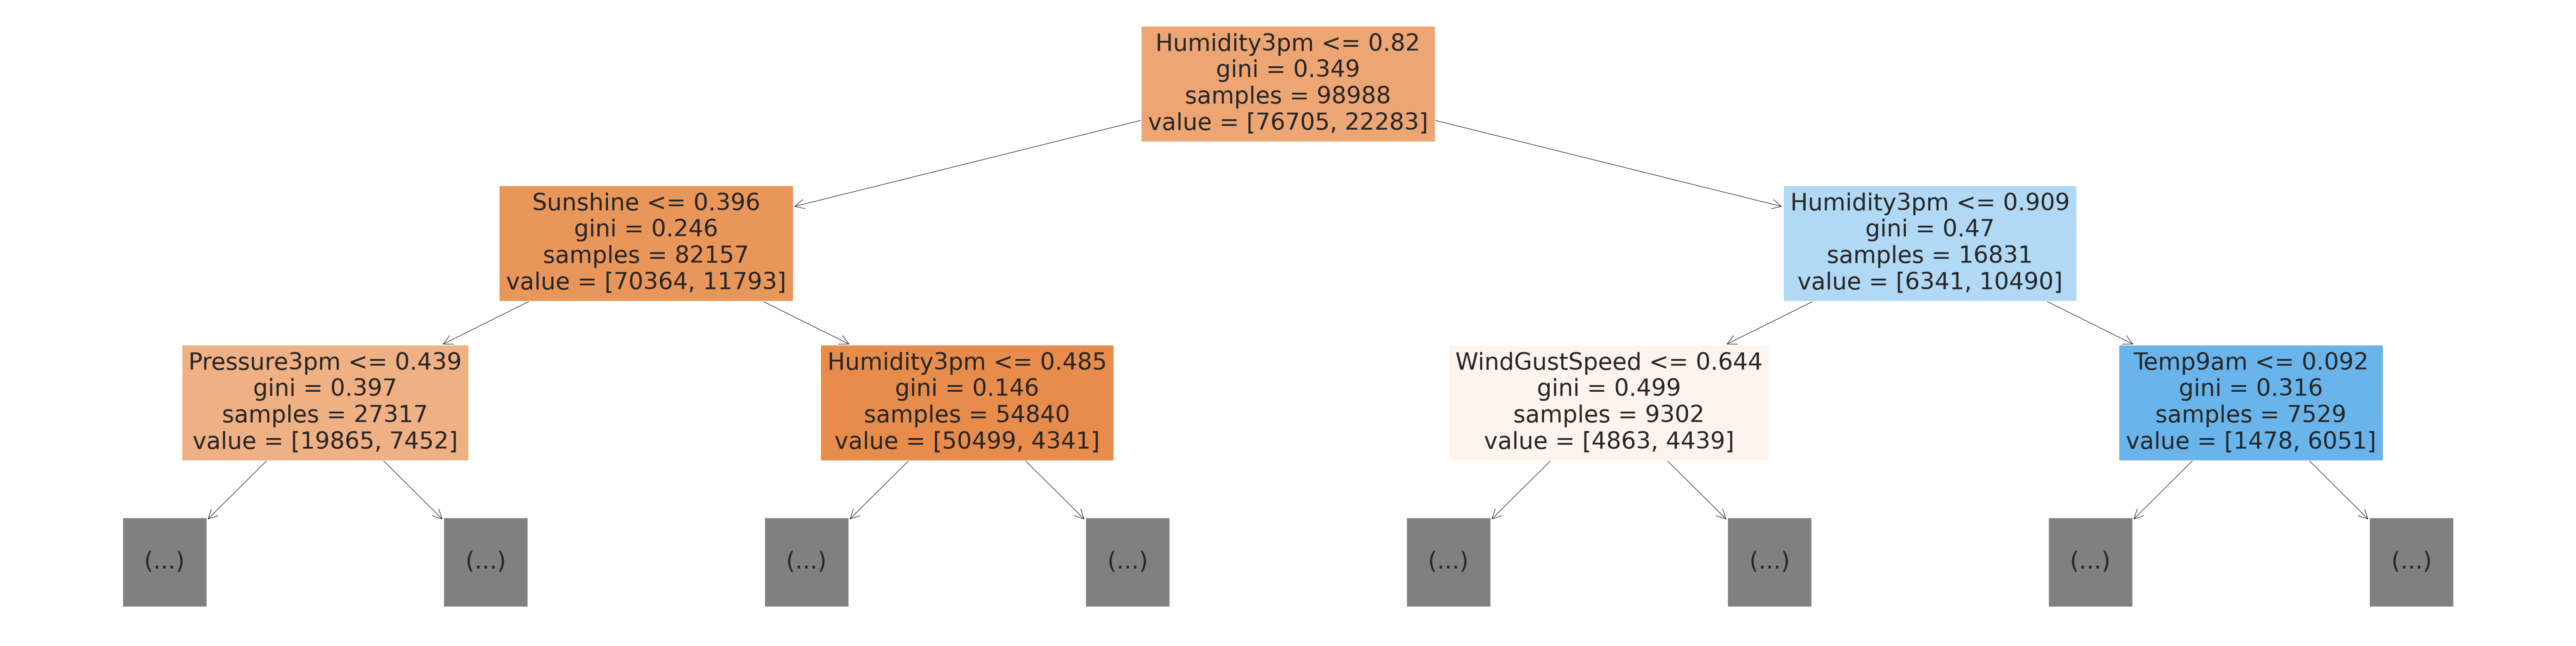

In [42]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True); #i restricted to depth 2

Can you see how the model classifies a given input as a series of decisions? The tree is truncated here, but following any path from the root node down to a leaf will result in "Yes" or "No". Do you see how a decision tree differs from a logistic regression model?


**How a Decision Tree is Created**

Note the `gini` value in each box. This is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split. A lower Gini index indicates a better split. A perfect split (only one class on each side) has a Gini index of 0. 

For a mathematical discussion of the Gini Index, watch this video: https://www.youtube.com/watch?v=-W0DnxQK1Eo . It has the following formula:

<img src="https://i.imgur.com/CSC0gAo.png" width="240">

Conceptually speaking, while training the models evaluates all possible splits across all possible columns and picks the best one. Then, it recursively performs an optimal split for the two portions. In practice, however, it's very inefficient to check all possible splits, so the model uses a heuristic (predefined strategy) combined with some randomization.

The iterative approach of the machine learning workflow in the case of a decision tree involves growing the tree layer-by-layer:

<img src="https://i.imgur.com/tlYiXnp.png" width="480">

Let's check the depth of the tree that was created.

In [43]:
model.tree_.max_depth

44

We can also display the tree as text, which can be easier to follow for deeper trees.

In [44]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.82
|   |--- Sunshine <= 0.40
|   |   |--- Pressure3pm <= 0.44
|   |   |   |--- WindGustSpeed <= 0.81
|   |   |   |   |--- Humidity3pm <= 0.61
|   |   |   |   |   |--- WindDir3pm_N <= 0.50
|   |   |   |   |   |   |--- Pressure3pm <= 0.31
|   |   |   |   |   |   |   |--- Sunshine <= 0.28
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.15
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- Sunshine <= 0.28
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Sunshine >  0.28
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- Humidity3pm >  0.15
|   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.10
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am <

### Feature Importance

Based on the gini index computations, a decision tree assigns an "$importance$" value to each feature. These values can be used to interpret the results given by a decision tree.

In [45]:
model.feature_importances_

array([3.01119921e-02, 2.70663980e-02, 3.45926020e-02, 3.34047642e-02,
       8.40216303e-02, 4.99577052e-02, 2.52980965e-02, 2.40319229e-02,
       3.02398018e-02, 2.56722181e-01, 3.83162503e-02, 7.01984932e-02,
       2.52240188e-02, 2.73693251e-02, 2.96834380e-02, 2.95431157e-02,
       2.46282406e-03, 1.92740059e-03, 1.72707293e-03, 5.97134834e-04,
       2.07143200e-03, 1.45024057e-03, 1.87681822e-03, 1.31384365e-03,
       1.10445525e-03, 1.55234760e-03, 9.35722488e-04, 2.36811631e-03,
       9.95639136e-04, 2.99898786e-04, 1.08604105e-03, 1.36756531e-03,
       1.75822407e-04, 1.52745261e-03, 1.18796723e-03, 7.24812962e-04,
       9.89157322e-04, 1.12020211e-03, 1.48064299e-03, 8.81955874e-04,
       1.17554586e-03, 8.74262424e-04, 1.57007624e-03, 1.48551093e-03,
       1.56811488e-03, 1.49536394e-03, 8.37173108e-04, 1.69510436e-03,
       1.54525486e-03, 2.09324197e-03, 7.73534492e-04, 1.36939383e-03,
       1.58511121e-03, 1.87128531e-03, 1.82357668e-03, 6.62413106e-04,
      

Let's turn this into a dataframe and visualize the most important features.

In [46]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [47]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.256722
4,Sunshine,0.084022
11,Pressure3pm,0.070198
5,WindGustSpeed,0.049958
10,Pressure9am,0.038316
2,Rainfall,0.034593
3,Evaporation,0.033405
8,Humidity9am,0.030240
0,MinTemp,0.030112
14,Temp9am,0.029683


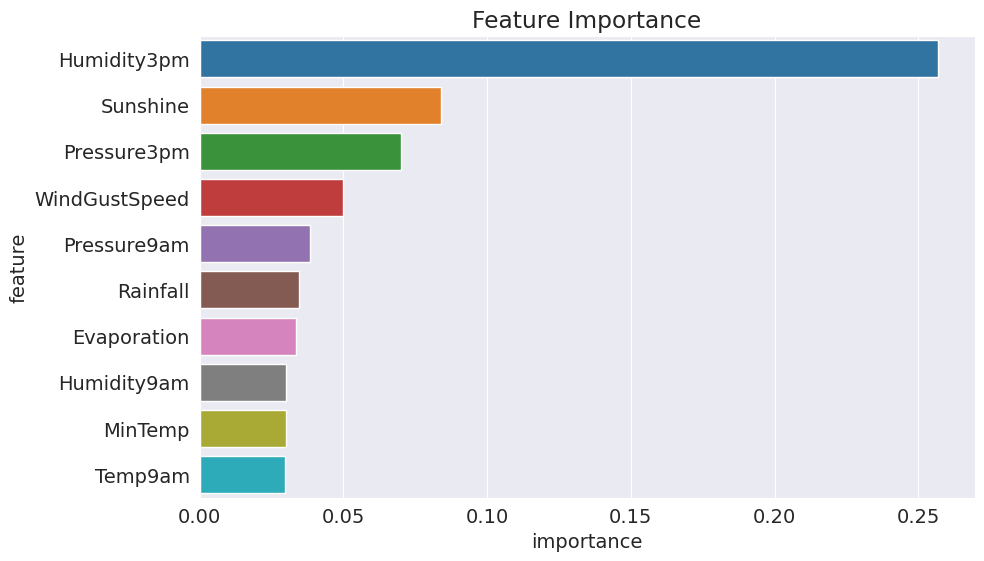

In [48]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

These were the top 10 importance features picked by our model.

# Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. 


The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

In [ ]:
?DecisionTreeClassifier

**These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:**

- `max_depth`
- `max_leaf_nodes`

## max_depth

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [49]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

We can compute the accuracy of the model on the training and validation sets using `model.score`

In [50]:
model.score(X_train, train_targets)

0.8303430718875016

In [51]:
model.score(X_val, val_targets)

0.8340200800882132

***Great, while the training accuracy of the model has gone down, the validation accuracy of the model has increased significantly. Again let's see the decision tree itself.***

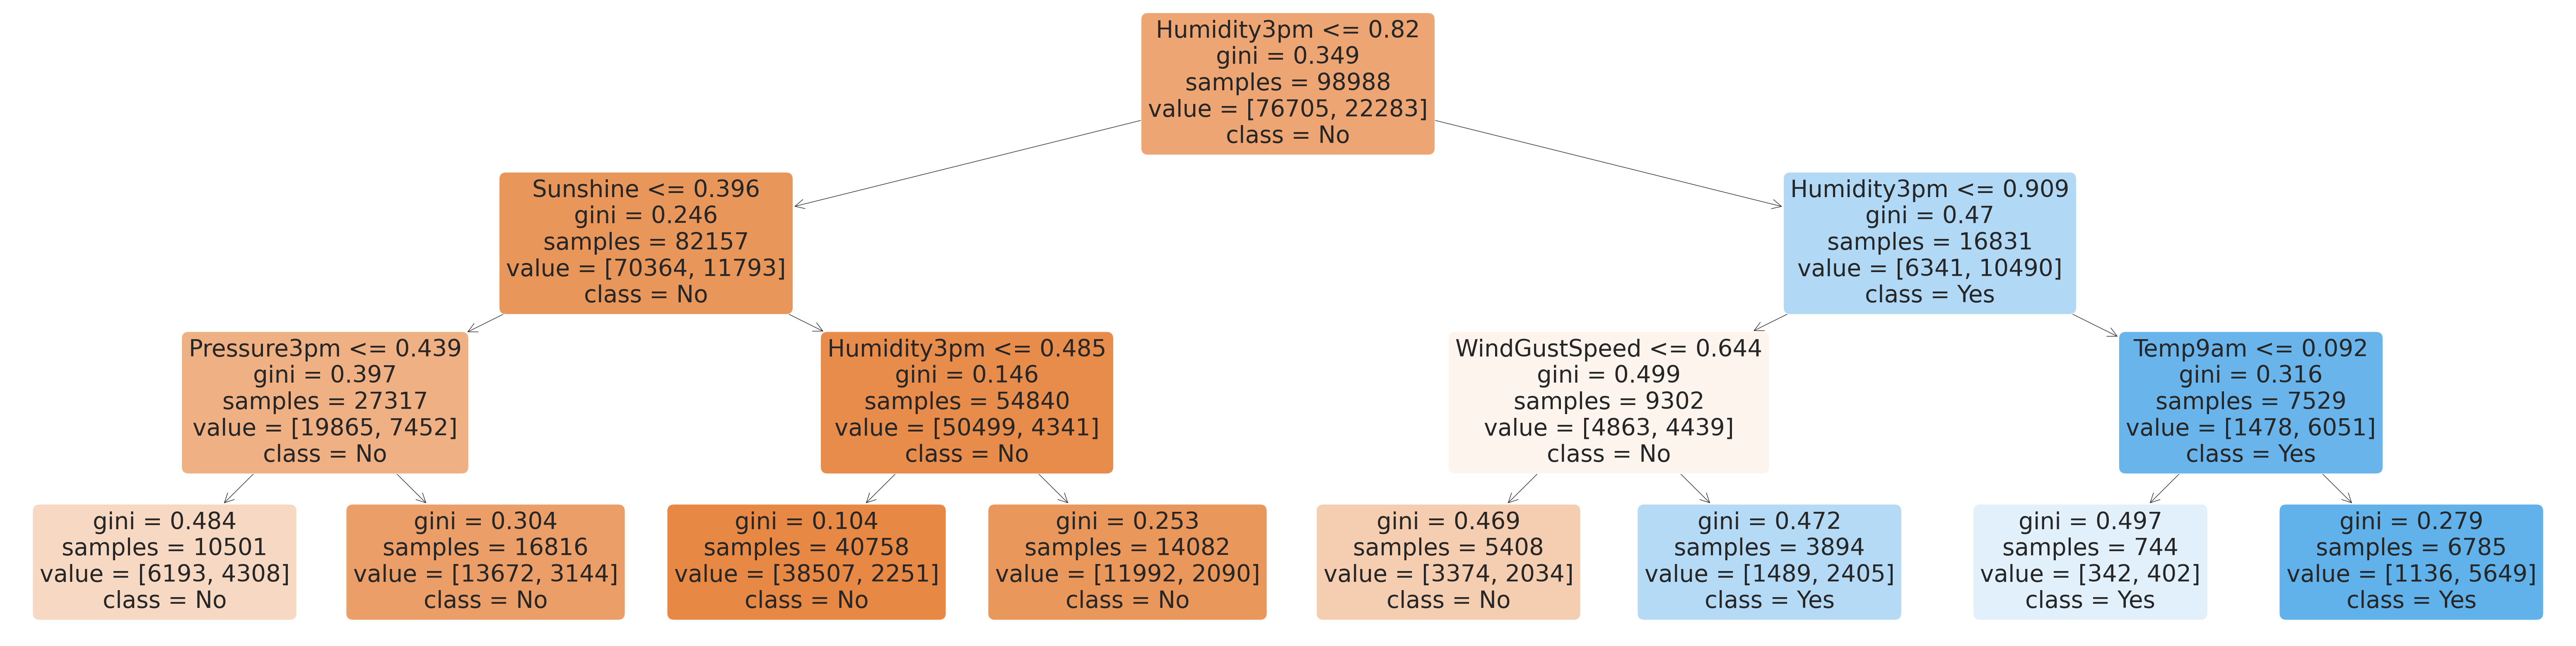

In [52]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

Let's experiment with different depths using a helper function. This function takes in different values of `max_depth` so that we can find the best one through iterating over multiple values.

In [53]:
def max_depth_error(md): #ms is max_deth here
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [54]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)]) #here the max_depth from range 1 to 21 is checked for the best depth.

CPU times: user 52.5 s, sys: 380 ms, total: 52.8 s
Wall time: 52.9 s


In [55]:
errors_df #created dataframe using the above function

,Max Depth,Training Error,Validation Error
0,1,0.183194,0.177587
1,2,0.178911,0.172132
2,3,0.169657,0.165980
3,4,0.166121,0.161047
4,5,0.157575,0.157623
5,6,0.156403,0.155708
6,7,0.152069,0.154489
7,8,0.147008,0.154489
8,9,0.140239,0.154547
9,10,0.130693,0.157101


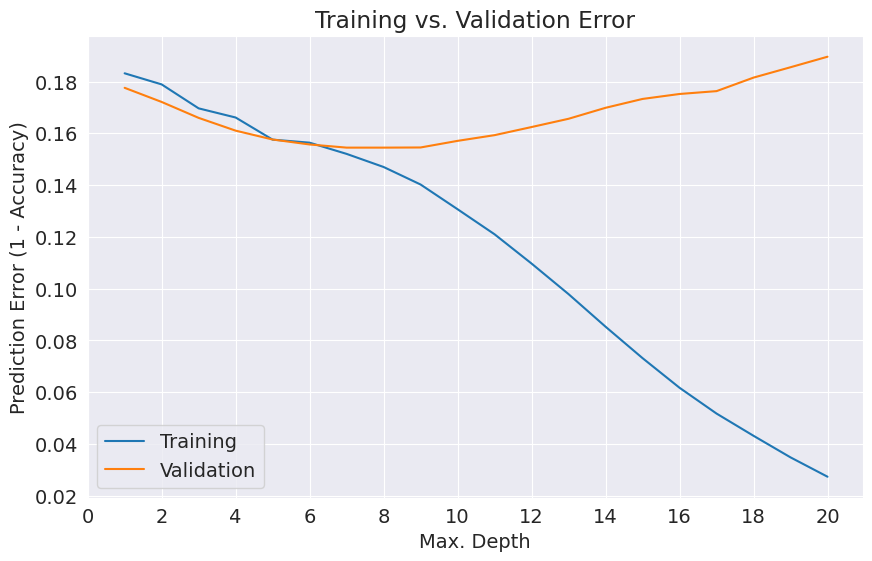

In [56]:
# Lets visualise the accuracy with various max_depth

plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

This is a common pattern you'll see with all machine learning algorithms:

<img src="https://i.imgur.com/EJCrSZw.png" width="700">





You'll often need to tune hyperparameters carefully to find the optimal fit. In the above case, it appears that a maximum depth of $8$ results in the lowest validation error.

In [57]:
model = DecisionTreeClassifier(max_depth=8, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8455109976205676

## max_leaf_nodes

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths. 

In [58]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42) #let's take a value of 128 ranomly to check how it affects the accuracy.

In [59]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [60]:
model.score(X_train, train_targets)

0.8504970299430233

In [61]:
model.score(X_val, val_targets)

0.8452788578724392

In [62]:
model.tree_.max_depth

10

Notice that the model was able to achieve a greater depth of $10$ for certain paths while keeping other paths shorter.

As we can using the good combination of `max_depth` and `max_leaf_nodes` makes the mode more accurate but isn't it painful to check manually for each combination? That is where `GRIDSEARCHCV` and `RANDOMSEARCHCV` methods comes in.

`GridSearchCV` and `RandomizedSearchCV` are two popular techniques for hyperparameter tuning in machine learning.

GridSearchCV is a technique for systematically searching over a hyperparameter grid to find the best combination of hyperparameters for a given model. The user specifies a range of values for each hyperparameter, and GridSearchCV generates all possible combinations of hyperparameters from those ranges. It then trains and evaluates the model for each combination of hyperparameters using cross-validation, and returns the combination of hyperparameters that results in the best performance.

RandomizedSearchCV is similar to GridSearchCV, but instead of searching over a pre-defined grid of hyperparameters, it searches over a random subset of the hyperparameter space. The user specifies a distribution over each hyperparameter, and RandomizedSearchCV generates random samples from those distributions to create a set of hyperparameters for each iteration. It then trains and evaluates the model for each set of hyperparameters using cross-validation, and returns the best performing set of hyperparameters.

The advantage of RandomizedSearchCV is that it can explore a much larger space of hyperparameters than GridSearchCV in the same amount of time, and may find better hyperparameter values than an exhaustive grid search. However, it is not guaranteed to find the optimal hyperparameters and may require more iterations to converge than GridSearchCV.

Overall, GridSearchCV and RandomizedSearchCV are both powerful tools for finding the best hyperparameters for a given model, and the choice between the two depends on the size of the hyperparameter space, the time and computational resources available, and the desired level of precision in the hyperparameter search.

Lets try to a gridsearchcv for our model

In [81]:
# Example hyperparameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [7, 8]
}

In [82]:
# GridSearchCV example
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5) #initialising the Gridsearch model

In [83]:
from tqdm import tqdm   
# Fit the GridSearchCV object with tqdm this shows a loading bar to track the progress
for i in tqdm(range(100)):
    grid_search.fit(X_train, train_targets) #this is similar to the function we created to test different `max_depth` above

 66%|██████▌   | 66/100 [34:20<17:41, 31.21s/it]


KeyboardInterrupt: 

In [98]:
# GridSearchCV example
best_params = grid_search.best_params_
best_params

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}

In [99]:
dtc_best = DecisionTreeClassifier(**best_params) #let's use the best params detected and train the model
dtc_best.fit(X_train, train_targets)
dtc_best.score(X_train, train_targets) #let's see the accuracy score of the newly trained model on the training dataset

0.8338788540025054

In [100]:
dtc_best.score(X_val, val_targets)  ##let's see the accuracy score of the newly trained model on the validation dataset

0.838953049735941

Given that the new score isn't that good, may be we need to better adjust and include new parameters. like this:

`param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8, None],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}`

> **EXTRA**: A more advanced technique (but less commonly used technique) for reducing overfitting in decision trees is known as cost-complexity pruning. Learn more about it here: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html . Let's Implement cost complexity pruning and see if there's any improvement in the validation accuracy.

$Pruning$ is a technique used to reduce overfitting in decision trees by removing nodes that do not contribute to the overall accuracy of the model. There are two main types of pruning: pre-pruning and post-pruning.

Pre-pruning involves setting a stopping criterion before the tree is built, such as limiting the maximum depth of the tree or the minimum number of samples required to split a node. Post-pruning involves building the full decision tree and then removing nodes that do not improve the model's accuracy.

In [ ]:
model = DecisionTreeClassifier(random_state=42) 
model.fit(X_train, train_targets)

In [102]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(val_targets, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8452788578724392


Prune the decision tree using `cost_complexity_pruning_path`:

In [104]:
path = model.cost_complexity_pruning_path(X_train, train_targets)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

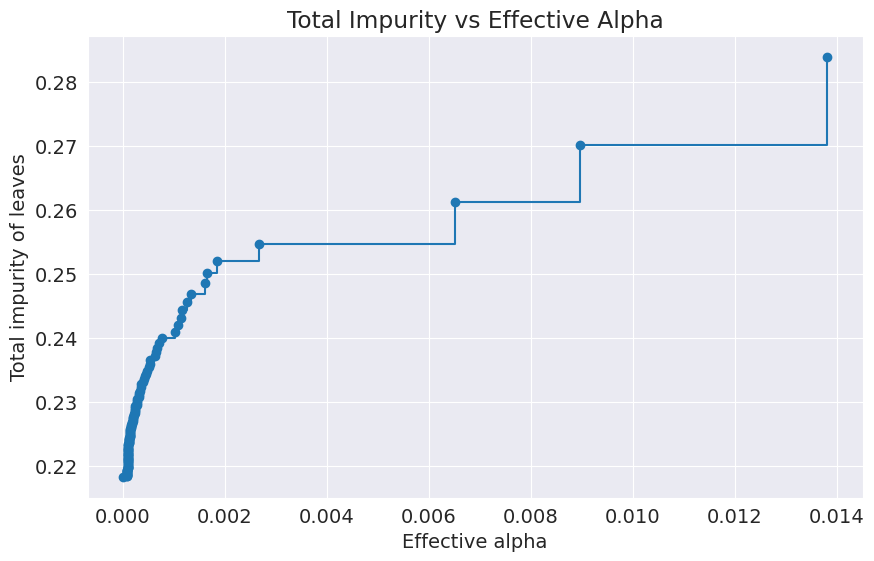

In [105]:
import matplotlib.pyplot as plt  #Visualize the relationship between the complexity parameter (alpha) and the accuracy of the model
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha")
plt.show()

In [107]:
dtc_list = []                   # Choose the value of alpha that gives the highest accuracy on the validation set
for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dtc.fit(X_train, train_targets)
    dtc_list.append(dtc)

train_scores = [dtc.score(X_train, train_targets) for dtc in dtc_list]
test_scores = [dtc.score(X_val, val_targets) for dtc in dtc_list]

best_alpha = ccp_alphas[test_scores.index(max(test_scores))]
print("Best alpha:", best_alpha)

Best alpha: 9.674554937290662e-05


In [ ]:
dtc_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha) #Build a decision tree using the best alpha value
dtc_pruned.fit(X_train, y_train)

In [ ]:
y_pred = dtc_pruned.predict(X_val)               # Calculate the accuracy of the pruned model on the testing data
accuracy = accuracy_score(val_targets, y_pred)
print("Accuracy:", accuracy)

# Summary and References

The following topics were covered in this tutorial:

- Downloading a real-world dataset
- Preparing a dataset for training
- Training and interpreting decision trees
- Training and interpreting random forests
- Overfitting & hyperparameter tuning
- Making predictions on single inputs



We also introduced the following terms:

* Decision tree
* Overfitting
* Hyperparameter
* Hyperparameter tuning


Check out the following resources to learn more: 

- https://scikit-learn.org/stable/modules/tree.html
- https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
- https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering
- https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search
- https://www.kaggle.com/c/home-credit-default-risk/discussion/64821


# Revision Questions
1.	What is a decision tree model?
2.	What is <code>DecisionTreeClassifier()</code>?
3.	Can we use decision tree only for Classifier? 
4.	How can you visualize the decision tree?
5.	What is <code>max_depth</code> in decision tree?
6.	What is gini index?
7.	What is feature importance?
8.	What is overfitting? What could be the reason for overfitting?
9.	What is hyperparameter tuning?
10.	What is one way to control the complexity of the decision tree?
11.	What is a random forest model?
12.	What is <code>RandomForestClassifier()</code>?
13.	What is <code>model.score()</code>?
14.	What is generalization?
15.	What is ensembling?
16.	What is <code>n_estimators</code> in hyperparameter tuning of random forests?
17.	What is underfitting?
18.	What does <code>max_features</code> parameter do?
19.	What are some features that help in controlling the threshold for splitting nodes in decision tree?
20.	What is bootstrapping? What is <code>max_samples</code> parameter in bootstrapping?
21.	What is <code>class_weight</code> parameter?
22.	You may or may not a see a significant improvement in the accuracy score with hyperparameter tuning. What could be the possible reasons for that?

# THE END